In [118]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

Affichage de l'image à segmenter

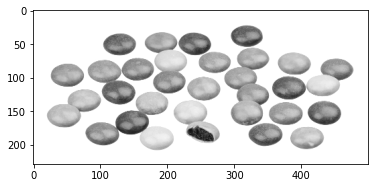

In [119]:
IM = cv2.imread('smarties.png',0)
plt.figure()
plt.imshow(IM,'gray')
plt.show()

Premier seuillage de l'image

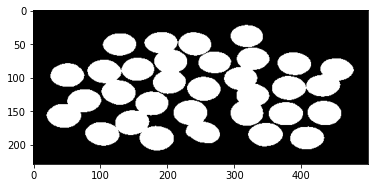

In [120]:
ret,thresh1 = cv2.threshold(IM,250,255,cv2.THRESH_BINARY_INV)
plt.figure()
plt.imshow(thresh1,'gray')
plt.show()

Affectation des labels sur les différents smarties

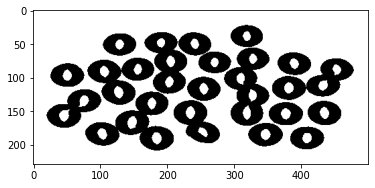

In [121]:
S = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(37,18)) #élément sous forme d'ellipse
I_erod=cv2.erode(thresh1,S,iterations=1) #érosion
seuil=255-I_erod
affich=seuil+thresh1
plt.imshow(affich,'gray')
plt.show()

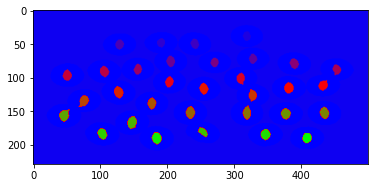

In [122]:
ret, labels = cv2.connectedComponents(I_erod) #explication
plt.imshow(labels+affich,'brg')
plt.show()

On regarde maintenant la carte des distances de l'image seuillée

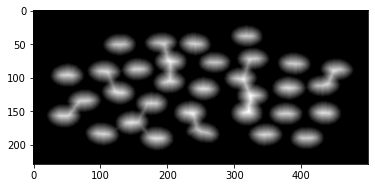

In [123]:
mask=3
I_dist=cv2.distanceTransform(thresh1,cv2.DIST_L2,mask)
plt.imshow(I_dist,'gray')
plt.show()

Valeurs de la carte des distances en uint8

20.125107
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
255


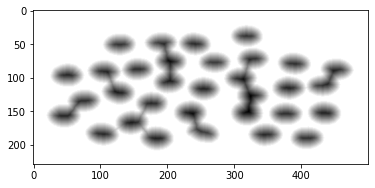

In [124]:
print(np.amax(I_dist))
I_dist=(255/np.amax(I_dist))*I_dist
I_dist=np.uint8(I_dist)
print(type(I_dist[0][0]))
print(np.amax(I_dist))
thresh1=np.uint8(thresh1)
print(type(thresh1[0][0]))
print(np.amax(thresh1))
plt.imshow(255-I_dist,'gray')
plt.show()

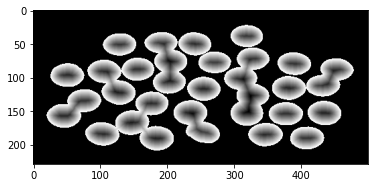

In [125]:
I_prio=thresh1-I_dist
plt.imshow(I_prio,'gray')
plt.show()